## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
""

''

### Find dimensions of an image in the dataset

In [4]:
print("Dimension of one Image in the Dataset is", x_train[0].shape)

Dimension of one Image in the Dataset is (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

In [6]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
trainY=np_utils.to_categorical(y_train,10)
testY=np_utils.to_categorical(y_test,10)
trainY[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
num_classes=testY.shape[1]

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
trainX=x_train/255
testX=x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
xtrain=trainX.reshape(trainX.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
xtest=testX.reshape(testX.shape[0],28,28,1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [12]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='valid', activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

model.fit(xtrain,trainY, validation_data=(xtest, testY), epochs=epochs, batch_size=32)
# Final evaluation of the modellbacks=callback_l
scores = model.evaluate(xtest, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,779,882
Trainable params: 2,779,882
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [13]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='valid', activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

model.fit(xtrain,trainY, validation_data=(xtest, testY), epochs=epochs, batch_size=32)
# Final evaluation of the modellbacks=callback_l
scores = model.evaluate(xtest, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
____

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,
                             samplewise_std_normalization=False,zca_whitening=False,rotation_range=50,
                            width_shift_range=.1, height_shift_range=.1, horizontal_flip=False, vertical_flip=False)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

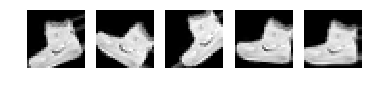

In [16]:
from matplotlib import pyplot as plt
gen = datagen.flow(xtrain[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [17]:
model.fit_generator(datagen.flow(xtrain,trainY, batch_size=32), validation_data=(xtest, testY), epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7018 - acc: 0.7427 - val_loss: 0.3149 - val_acc: 0.8904
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5271 - acc: 0.8037 - val_loss: 0.3558 - val_acc: 0.8653
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4784 - acc: 0.8220 - val_loss: 0.3275 - val_acc: 0.8767
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4517 - acc: 0.8318 - val_loss: 0.3048 - val_acc: 0.8905
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4221 - acc: 0.8417 - val_loss: 0.3005 - val_acc: 0.8915
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4104 - acc: 0.8478 - val_loss: 0.3011 - val_acc: 0.8917
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4017 - acc: 0.8501 - val_loss: 0.3045 - val_acc: 0.8856
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [18]:
Test_scores = model.evaluate(xtest, testY, verbose=0)
Train_scores = model.evaluate(xtrain, trainY, verbose=0)

#model.history()
print("Train Accuracy: %.2f%%" % (Train_scores[1]*100))
print("Test Accuracy: %.2f%%" % (Test_scores[1]*100))

Train Accuracy: 90.55%
Test Accuracy: 89.05%


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [20]:
(xtrain_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
xtrain_cifar=xtrain_cifar/255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,
                             samplewise_std_normalization=False,zca_whitening=False,rotation_range=50,
                            width_shift_range=.1, height_shift_range=.1, horizontal_flip=True, vertical_flip=False)

### **Prepare/fit the generator.**

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(xtrain_cifar[0:1], batch_size=1)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

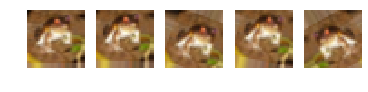

In [27]:
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()